In [1]:
from simulation import CallCenter
from simulation import  Core

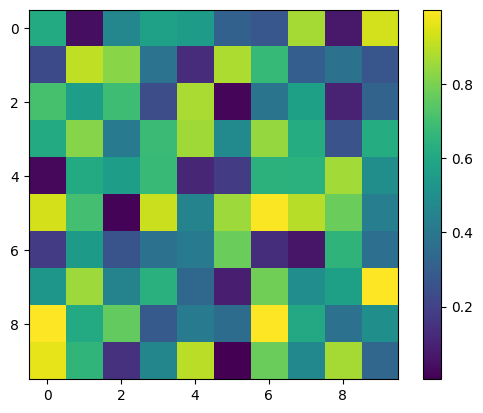

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
data = np.random.rand(10, 10)  # 10x10 grid of random values

plt.imshow(data, cmap='viridis')  # 'cmap' specifies the color map
plt.colorbar()  # Optional: adds a color bar to the side
plt.show()


In [13]:
from scipy.optimize import milp, linprog
import numpy as np

D = [
    4, 8, 10, 16, 15, 14, 12, 6, 6, 6, 7, 6, 7, 6, 14, 14, 12, 12
]

fullSchedule = [1] * 18

scheduleType1 = list(fullSchedule)
scheduleType1[5] = 0
scheduleType1[6] = 0

scheduleType2 = list(fullSchedule)
scheduleType2[7] = 0
scheduleType2[8] = 0

scheduleType3  = list(fullSchedule)
scheduleType3[9] = 0
scheduleType3[10] = 0


agentAvailability = [
    scheduleType1, scheduleType1, scheduleType1, scheduleType1, scheduleType1, 
    scheduleType2, scheduleType2, scheduleType2, scheduleType2, scheduleType2, 
    scheduleType3, scheduleType3, scheduleType3, scheduleType3, scheduleType3, 
]

schedule1Coef = sum(scheduleType1)
schedule2Coef = sum(scheduleType2)
schedule3Coef = sum(scheduleType3)

coefs = np.array([
    schedule1Coef, schedule1Coef, schedule1Coef, schedule1Coef, schedule1Coef,
    schedule2Coef, schedule2Coef, schedule2Coef, schedule2Coef, schedule2Coef,
    schedule3Coef, schedule3Coef, schedule3Coef, schedule3Coef, schedule3Coef,
])

Aub = np.array(coefs).reshape(1,15)
Aub = -Aub
res = linprog(c = coefs, integrality = 1, A_ub=Aub, b_ub=-np.sum(D), bounds = [(0,1)]*15)

In [19]:
sum(D)

175

In [18]:
res.x, res.fun

(array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 176.0)

In [12]:
Aub

array([-16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16,
       -16, -16])

In [2]:
q = Core.AppPriorityQueue()

q.enqueue(1, 1)
q.enqueue(2, 2)
q.enqueue(3, 3)
q.tryDequeueItem(2)

while  q.empty() == False:
    print(q.dequeue())

1
3


In [6]:
paperSchedule = [
    4, 8, 10, 16, 15, 14, 12, 6, 6, 6, 7, 6, 7, 6, 14, 14, 12, 12
]   # copied from the paper

assert len(paperSchedule) == 18

case = CallCenter.CallCenterCase(paperSchedule)
res = case.run(100)
res.summaryData

{'avgQualityOfService': 86.65057699999997,
 'avgAgentUtilizationRate': 58.66398300000001,
 'avgMaxTimeInQueue': 60.00000000000003,
 'avgAvgTimeInQueue': 12.093202083431203,
 'avgMaxServiceTime': 1590.879146626108,
 'avgAvgServiceTime': 306.90758292824773,
 'avgCustomerArrived': 536.99,
 'avgCustomerServed': 465.05,
 'maxMaxQueueLength': (8,),
 'avgRenegeRate': 0.13349423844547206,
 'avgAvgQueueLengthOverTime': 0.20321913079973225}